# Vamos realizar o upload de uma base de dados divulgada pela banca AOCP no concurso de 2025 para Empresa <span style="color:green">Paraná Previdência</span>.

## Site da banca: https://www.institutoaocp.org.br/

### Nestes casos, a banca divulgou os resultados em um arquivo .pdf e fica um pouco díficil saber a real posição de um cadidato.

### Vamos tomar como exemplo encontrar a posição do Candidado Gustavo Strauch Wilin Finger para o cargo de Administrador. Iremos comparar a nota dele com a as notas médias dos candidados que aplicaram para a mesma posição e mesma vaga.

### O resultado da banca está em:

https://arquivos-site.institutoaocp.org.br/publicacoes/8c103383-ae7e-4c1b-838d-47135d8332a9.pdf

## Instalação da biblioteca pdfplumber
### biblioteca necessária para leitura e extração de dados de um arquivo em .pdf

In [ ]:
!pip install pdfplumber

In [ ]:
# Hora de importar as bilbiotecas necessárias para análise

import pandas as pd
import pdfplumber


In [ ]:
#arquivo_pdf = "8c103383-ae7e-4c1b-838d-47135d8332a9"

# coloquei este arquivo junto com o notebook, mas é possível renomeá-lo para ficar mais fácil para ti.

# Quantidade de páginas Desejados
paginas_desejadas = range(47, 53+1) # os cargos de administrador começam na página 48

with pdfplumber.open("8c103383-ae7e-4c1b-838d-47135d8332a9.pdf") as pdf:
    primeira_pagina = pdf.pages[47]  # Escolhe a página 48 (índice começa em 0) para exemplo
    tabela = primeira_pagina.extract_table()  # Extrai a tabela



df = pd.DataFrame(tabela[2:])  # Define cabeçalhos - quero tirar os cabeçalhos da primeira linha, então comecei pela segunda linha.

df.head(20)


,0,1,2,3,4,5
0,Adair Anholeto,1000003130,6.00,5.00,34.00,45.00
1,Adriano Lopes De Cordova,1000007743,8.00,17.00,48.00,73.00
2,Alessandra Da Fontoura Pires Falcao,1000006853,5.00,8.00,38.00,51.00
3,Alessandro Chemin,1000010223,6.00,9.00,48.00,63.00
4,Alfredo Luiz Schavaren,1000018444,2.00,10.00,38.00,50.00
5,Amanda Pryscila Dos Santos Xavier Da Silva,1000007627,6.00,11.00,32.00,49.00
6,Ana Lucia Neotti,1000001461,5.00,4.00,48.00,57.00
7,Ana Paula Moro,1000000744,6.00,11.00,42.00,59.00
8,Ana Paula Nascimento Da Silva,1000006236,4.00,8.00,42.00,54.00
9,Ana Paula Santos De Carvalho,1000001320,4.00,9.00,34.00,47.00


## percebam que só pegamos a primeira página do documentos, mas nós temos muito mais.


In [ ]:

#vamos pegar mais de uma página

# Nome do arquivo PDF
caminho_pdf = "8c103383-ae7e-4c1b-838d-47135d8332a9.pdf"

# Intervalo de páginas desejado (48 a 53, lembrando que o índice começa em 0)
paginas_desejadas = range(48, 57)

# Lista para armazenar os DataFrames de cada página
tabelas_extraidas = []

# Abrindo o PDF
with pdfplumber.open(caminho_pdf) as pdf:
    for i in paginas_desejadas:
        pagina = pdf.pages[i]  # Acessa a página correta
        tabelas_pagina = pagina.extract_tables()  # Extrai todas as tabelas da página

        if tabelas_pagina:  # Verifica se há tabelas na página
            for tabela in tabelas_pagina:
                df_temp = pd.DataFrame(tabela[0:])  # Remove a primeira linha como cabeçalho
                tabelas_extraidas.append(df_temp)  # Armazena no array de DataFrames

# Unir todas as tabelas extraídas em um único DataFrame
if tabelas_extraidas:
    df_final = pd.concat(tabelas_extraidas, ignore_index=True)
    print(df_final.head())  # Exibir as primeiras linhas
else:
    print("Nenhuma tabela foi encontrada no intervalo de páginas especificado.")

                                    0           1     2      3      4      5
0         André Luiz Teixeira Cardoso  1000011476  4.00   8.00  46.00  58.00
1  Andressa Bertolli Sarnacki Guiraud  1000008966  4.00  10.00  44.00  58.00
2            Aneliz Ferreira Marcilio  1000014305  8.00  10.00  38.00  56.00
3                   Anna Giulia Hecke  1000009023  4.00   6.00  46.00  56.00
4           Antonio Sergio Martelotti  1000016897  6.00  12.00  36.00  54.00


In [ ]:
df_final.tail(20) # mostrando as últimas 20 posições da tabela incluída. # percebemos que precisamos tirar da linha 155 em diante

,0,1,2,3,4,5
151,Victoria Figueira Da Silva,1000002630,6.00,10.00,40.00,56.00
152,Vitor Pereira Rodrigues,1000018620,3.00,4.00,40.00,47.00
153,Viviane Cristina Langovski,1000015980,9.00,16.00,44.00,69.00
154,Wender Ribeiro,1000015154,5.00,12.00,32.00,49.00
155,402 - ADVOGADO,None,None,None,None,None
156,NOME,INSCRIÇÃO,Língua Portuguesa,Informática,Conhecimentos\nEspecíficos,NOTA OBJETIVA
157,Alan Cristian Justino,1010015944,4.00,10.00,52.00,66.00
158,Alan Ferracioli Beltrão,1010018338,5.00,6.00,52.00,63.00
159,Alan Polli Dias,1010000962,6.00,10.00,60.00,76.00
160,Alessandra Monteiro Tavares E Silva,1010009717,6.00,6.00,50.00,62.00


In [ ]:
df_final = df_final.iloc[:155] # exluindo as posições que não desejamos - somente de 0 até a linha 154
df_final.tail(10)

,0,1,2,3,4,5
145,Thays Gonçalves,1000010712,3.00,9.00,40.00,52.00
146,Valter Henrique Fernandes,1000014833,6.00,11.00,38.00,55.00
147,Vanessa Alves Hirata Osawa,1000001380,5.00,11.00,46.00,62.00
148,Vanessa Danielli Massambani,1000001082,6.00,12.00,36.00,54.00
149,Vanessa Lopes Izar Pelizzari,1000012475,7.00,6.00,38.00,51.00
150,Vanscleifi Troli Ferreira Da Costa,1000014763,6.00,12.00,40.00,58.00
151,Victoria Figueira Da Silva,1000002630,6.00,10.00,40.00,56.00
152,Vitor Pereira Rodrigues,1000018620,3.00,4.00,40.00,47.00
153,Viviane Cristina Langovski,1000015980,9.00,16.00,44.00,69.00
154,Wender Ribeiro,1000015154,5.00,12.00,32.00,49.00


Vamos juntar a primeira página que tinhámos (df) com o todas as que temos arrumadas (df_final)

In [ ]:
df_final_administrador = pd.concat([df, df_final], ignore_index=True)
df_final_administrador.head(10)

,0,1,2,3,4,5
0,Adair Anholeto,1000003130,6.00,5.00,34.00,45.00
1,Adriano Lopes De Cordova,1000007743,8.00,17.00,48.00,73.00
2,Alessandra Da Fontoura Pires Falcao,1000006853,5.00,8.00,38.00,51.00
3,Alessandro Chemin,1000010223,6.00,9.00,48.00,63.00
4,Alfredo Luiz Schavaren,1000018444,2.00,10.00,38.00,50.00
5,Amanda Pryscila Dos Santos Xavier Da Silva,1000007627,6.00,11.00,32.00,49.00
6,Ana Lucia Neotti,1000001461,5.00,4.00,48.00,57.00
7,Ana Paula Moro,1000000744,6.00,11.00,42.00,59.00
8,Ana Paula Nascimento Da Silva,1000006236,4.00,8.00,42.00,54.00
9,Ana Paula Santos De Carvalho,1000001320,4.00,9.00,34.00,47.00


In [ ]:
df_final_administrador.tail(10)

,0,1,2,3,4,5
158,Thays Gonçalves,1000010712,3.00,9.00,40.00,52.00
159,Valter Henrique Fernandes,1000014833,6.00,11.00,38.00,55.00
160,Vanessa Alves Hirata Osawa,1000001380,5.00,11.00,46.00,62.00
161,Vanessa Danielli Massambani,1000001082,6.00,12.00,36.00,54.00
162,Vanessa Lopes Izar Pelizzari,1000012475,7.00,6.00,38.00,51.00
163,Vanscleifi Troli Ferreira Da Costa,1000014763,6.00,12.00,40.00,58.00
164,Victoria Figueira Da Silva,1000002630,6.00,10.00,40.00,56.00
165,Vitor Pereira Rodrigues,1000018620,3.00,4.00,40.00,47.00
166,Viviane Cristina Langovski,1000015980,9.00,16.00,44.00,69.00
167,Wender Ribeiro,1000015154,5.00,12.00,32.00,49.00


# renomeando as colunas
## colunas com o nome das áreas avaliadas no concurso


In [ ]:
novos_nomes = ["Nome", "Inscrição", "POR","LEG","CON_E","Nota Objetiva"]
df_final_administrador.columns = novos_nomes
df_final_administrador.tail(10)

,Nome,Inscrição,POR,LEG,CON_E,Nota Objetiva
158,Thays Gonçalves,1000010712,3.00,9.00,40.00,52.00
159,Valter Henrique Fernandes,1000014833,6.00,11.00,38.00,55.00
160,Vanessa Alves Hirata Osawa,1000001380,5.00,11.00,46.00,62.00
161,Vanessa Danielli Massambani,1000001082,6.00,12.00,36.00,54.00
162,Vanessa Lopes Izar Pelizzari,1000012475,7.00,6.00,38.00,51.00
163,Vanscleifi Troli Ferreira Da Costa,1000014763,6.00,12.00,40.00,58.00
164,Victoria Figueira Da Silva,1000002630,6.00,10.00,40.00,56.00
165,Vitor Pereira Rodrigues,1000018620,3.00,4.00,40.00,47.00
166,Viviane Cristina Langovski,1000015980,9.00,16.00,44.00,69.00
167,Wender Ribeiro,1000015154,5.00,12.00,32.00,49.00


In [ ]:
# vamos econtrar o Gustavo na planilha e iremos salvar as notas dele no dataframe df_Gustavo

df_Gustavo = df_final_administrador[df_final_administrador["Nome"] == "Gustavo Strauch Wilin Finger"]
df_Gustavo

,Nome,Inscrição,POR,LEG,CON_E,Nota Objetiva
72,Gustavo Strauch Wilin Finger,1000012589,4.00,13.00,36.00,53.00


## Ordenando por meio de uma coluna específica
###   no caso pela Nota_Objetiva, pois é ela que dará as classificação
### se houver impate de nota, vamos colocar por nota no conhecimento específico
### se houver impate de nota, vamos colocar por Portugês*
*não necessariamente consta no Edital


In [ ]:
df_ordenado = df_final_administrador.sort_values(by=["Nota Objetiva","CON_E", "POR"], ascending=[False, False, False]).reset_index()
df_ordenado

,index,Nome,Inscrição,POR,LEG,CON_E,Nota Objetiva
0,35,Dafne Melo E Silva,1000012287,6.00,15.00,52.00,73.00
1,1,Adriano Lopes De Cordova,1000007743,8.00,17.00,48.00,73.00
2,62,Fernando Ferrari De Morais,1000003653,7.00,16.00,48.00,71.00
3,100,Luciano Marcos Turra,1000011494,6.00,12.00,52.00,70.00
4,129,Pedro Cristiano Becker,1000004028,6.00,16.00,48.00,70.00
...,...,...,...,...,...,...,...
163,128,Paula Caroline Ache Mansur,1000001009,4.00,5.00,36.00,45.00
164,0,Adair Anholeto,1000003130,6.00,5.00,34.00,45.00
165,142,Sabrina Cardozo Ferreira,1000001300,5.00,8.00,32.00,45.00
166,33,Conrado Ferreira De Lima,1000006944,7.00,8.00,30.00,45.00


In [ ]:
df_ordenado[df_ordenado["Nome"] == "Gustavo Strauch Wilin Finger"] # para verificar a real posição e não mais a localização na tabela da Banca.


,index,Nome,Inscrição,POR,LEG,CON_E,Nota Objetiva
89,72,Gustavo Strauch Wilin Finger,1000012589,4.00,13.00,36.00,53.00


# A real posição do Gustavo, pelos critérios adotados é 89º

In [ ]:
len(df_ordenado) # quantidade de candidatos para administração (cargo de administrador) após a divulgação dos aprovados.


168

## Mas e a quantidade de inscritos?
## vamos ter que pegar de outro edital do concurso,
## disponível em:

https://arquivos-site.institutoaocp.org.br/publicacoes/b8fbdada-c33c-48e3-9918-bf3c784a8ced.pdf

In [ ]:
#vamos pegar mais de uma página

caminho_pdf = "b8fbdada-c33c-48e3-9918-bf3c784a8ced.pdf"

# Lista para armazenar os DataFrames de cada página
tabelas_inscritos = []

# Abrindo o PDF
with pdfplumber.open(caminho_pdf) as pdf:
    # Extraindo o cabeçalho da primeira página
    primeira_pagina = pdf.pages[0]
    tabela_primeira = primeira_pagina.extract_table()

    if tabela_primeira:  # Se houver tabela na primeira página
        colunas = tabela_primeira[0]  # Pegamos apenas a primeira linha como cabeçalho

    # Loop pelas páginas (da 1ª até a 10ª)
    for i in range(10):
        if i < len(pdf.pages):  # Garante que a página existe
            pagina = pdf.pages[i]
            tabela = pagina.extract_table()

            if tabela:  # Se houver tabela na página
                df_pagina = pd.DataFrame(tabela[5:], columns=colunas)  # Usa o cabeçalho fixo da 1ª página
                tabelas_inscritos.append(df_pagina)

# Concatenar todas as tabelas extraídas em um único DataFrame
df_inscritos = pd.concat(tabelas_inscritos, ignore_index=True)

# Exibir as primeiras linhas do DataFrame final
df_inscritos.head()

,PARANAPREVIDÊNCIA\nESTADO DO PARANÁ,None
0,AÇUCENA TRAYA,1000000304
1,ADAIR ANHOLETO,1000003130
2,ADARLAN JOSÉ TRAMONTIN,1000017083
3,ADEMAR HENRIQUE DA SILVA ALEXANDRINO,1000013842
4,ADILANIA DE SOUZA RODRIGUES,1000005476


In [ ]:
# vamos ver as últimas linhas
df_inscritos.tail(10)

,PARANAPREVIDÊNCIA\nESTADO DO PARANÁ,None
548,WANESSA MARTINS LOPES,1000018631
549,WENDER RIBEIRO,1000015154
550,WILLIAM POLINATI DA SILVA LAMAS VECCHI,1000012647
551,WILLIAM WINTER CRISTOFOLI,1000011124
552,YASMIN DUARTE LEITE,1000001407
553,402 - ADVOGADO,None
554,Nome,Inscrição
555,ADÉRITO SEBASTIÃO DE ALMEIDA AGOSTINHO ANTONIO,1010004829
556,ADILSON AUGUSTO WASSAO JUNIOR,1010013980
557,ADILSON CARLOS DE OLIVEIRA,1010000849


In [ ]:
# excluindo até a posição 553

df_inscritos = df_inscritos.iloc[:553] # exluindo as posições que não desejamos - somente de 0 até a linha 552
df_inscritos.tail(10)

,PARANAPREVIDÊNCIA\nESTADO DO PARANÁ,None
543,VIVIANE CRISTINA LANGOVSKI,1000015980
544,WAGNER KENJI INOUE,1000003602
545,WAGNER KOVALSKI GARCIA,1000016809
546,WAGNER WILLMS,1000000535
547,WALESKA DO CARMO SAMUEL,1000017045
548,WANESSA MARTINS LOPES,1000018631
549,WENDER RIBEIRO,1000015154
550,WILLIAM POLINATI DA SILVA LAMAS VECCHI,1000012647
551,WILLIAM WINTER CRISTOFOLI,1000011124
552,YASMIN DUARTE LEITE,1000001407


In [ ]:
len(df_inscritos) # quantidade de inscritos para a vaga de Administrador neste concurso.

553

In [ ]:
df_ordenado.to_excel("df_ordenado.xlsx", index=True) # exportando para excel
df_ordenado.head()

,index,Nome,Inscrição,POR,LEG,CON_E,Nota Objetiva
0,35,Dafne Melo E Silva,1000012287,6.00,15.00,52.00,73.00
1,1,Adriano Lopes De Cordova,1000007743,8.00,17.00,48.00,73.00
2,62,Fernando Ferrari De Morais,1000003653,7.00,16.00,48.00,71.00
3,100,Luciano Marcos Turra,1000011494,6.00,12.00,52.00,70.00
4,129,Pedro Cristiano Becker,1000004028,6.00,16.00,48.00,70.00


### Vamos calcular a média por matéria para todos os Candidados à vaga para de administrador


In [ ]:
# convertendo os valores das colunas para númerico
df_ordenado['Nota Objetiva'] =  pd.to_numeric(df_ordenado['Nota Objetiva'])
df_ordenado['CON_E'] =  pd.to_numeric(df_ordenado['CON_E'])
df_ordenado['LEG'] =  pd.to_numeric(df_ordenado['LEG'])
df_ordenado['POR'] =  pd.to_numeric(df_ordenado['POR'])

In [ ]:
mdias_candidados_ADM = df_ordenado.iloc[:,3:7].mean(axis=0).rename("Média_Por_Materia")
mdias_candidados_ADM
# esta média é somente para os candidatos ao cargo de administrador

,Média_Por_Materia
POR,4.892857
LEG,9.071429
CON_E,40.226190
Nota Objetiva,54.190476


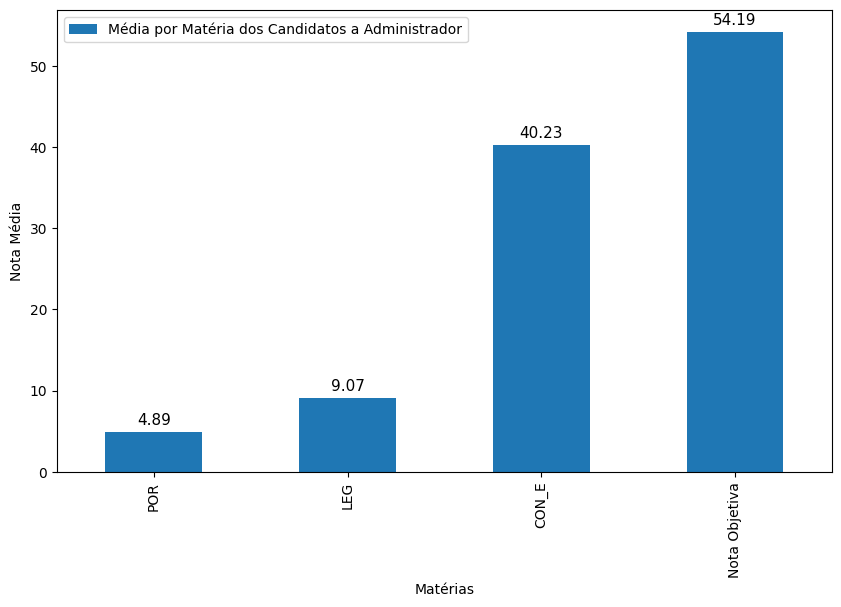

In [ ]:
# colocando os valores das médias das notas em um gráfico de barras

ax = mdias_candidados_ADM.plot(kind = 'bar', figsize=(10,6), ylabel= "Nota Média", xlabel= "Matérias", legend=True, label="Média por Matéria dos Candidatos a Administrador")

# Adicionando os valores acima das barras
# Adicionando os valores acima das barras manualmente
for i, valor in enumerate(mdias_candidados_ADM):
    ax.annotate(f"{valor:.2f}",
                xy=(i, valor),
                xytext=(0, 5),
                textcoords="offset points",
                ha="center", fontsize=11, color="black")



In [ ]:
type(mdias_candidados_ADM) # verificando o tipo da váriavel criada

pandas.core.series.Series

In [ ]:
type(df_Gustavo) # verificando o tipo da váriavel criada

pandas.core.frame.DataFrame

## Hora de comparar as notas
### vamos primeiro pegar a notas do Candidato

In [ ]:
Notas_Candidado = df_Gustavo.iloc[:,2:7] # pegando somente as notas do Gustavo
Notas_Candidado

,POR,LEG,CON_E,Nota Objetiva
72,4.00,13.00,36.00,53.00


In [ ]:
Notas_Candidado= Notas_Candidado.T # transpondo o Dataframe das notas do candidado para ficar no mesmo formato do dataframe da nota
nome = df_ordenado[df_ordenado["Nome"] == "Gustavo Strauch Wilin Finger"].iloc[0, 1]
nome
novos_nomes = [nome] # pegar o nome do Candidato Gustavo (escolhido para fins didáticos)
Notas_Candidado.columns = novos_nomes
Notas_Candidado

,Gustavo Strauch Wilin Finger
POR,4.00
LEG,13.00
CON_E,36.00
Nota Objetiva,53.00


# Vamos juntar os dois dataframes para comparar a nota do candidato com as notas da turma dos candidatos ao cargo de administrador.

In [ ]:
comparacao_df = pd.concat([mdias_candidados_ADM, Notas_Candidado], axis=1)
# transformando a segunda coluna para valores inteiros
comparacao_df[nome] = comparacao_df[nome].astype(str).str.replace(",", ".").astype(float)
comparacao_df

,Média_Por_Materia,Gustavo Strauch Wilin Finger
POR,4.892857,4.0
LEG,9.071429,13.0
CON_E,40.226190,36.0
Nota Objetiva,54.190476,53.0


## comparando as notas do candidado com a média dos outros candidatos

In [ ]:
comparacao_df['Variação em %'] = ((comparacao_df[nome]-comparacao_df['Média_Por_Materia'])/comparacao_df[nome])*100
comparacao_df

,Média_Por_Materia,Gustavo Strauch Wilin Finger,Variação em %
POR,4.892857,4.0,-22.321429
LEG,9.071429,13.0,30.219780
CON_E,40.226190,36.0,-11.739418
Nota Objetiva,54.190476,53.0,-2.246181


### plotando os dados em um gráfico de barras para melhor visualização

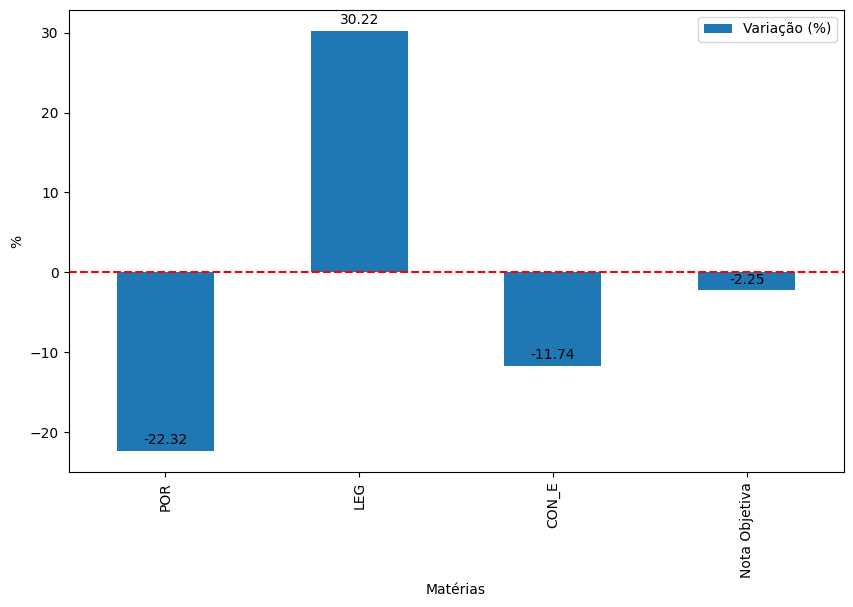

In [ ]:
# colocando os valores das médias das notas em um g´rafico de barras

ax = comparacao_df['Variação em %'].plot(kind = 'bar', figsize=(10,6), ylabel= "%", xlabel= "Matérias", legend=True, label="Variação (%)")

ax.axhline(y=0, color='r', linestyle='--')

# Adicionando os valores acima das barras manualmente
for i, valor in enumerate(comparacao_df['Variação em %']):
    ax.annotate(f"{valor:.2f}",
                xy=(i, valor),
                xytext=(0, 5),
                textcoords="offset points",
                ha="center", fontsize=10, color="black")
